#  <font color='midnightblue'>`Predicting Titanic Surival via Logistic Regression`</font> 

## PROBLEM STATEMENT

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 


Inputs: 
- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Output: 
- Target class: Survived: Survival	(0 = No, 1 = Yes)


<img src="titanicII.png" style="width: 55%;"/>

### DATA SOURCE: https://www.kaggle.com/c/titanic

## LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## IMPORT DATASET

In [2]:
# read the data using pandas dataframe
training_set = pd.read_csv('Train_Titanic.csv')

In [3]:
# Show the data head
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Show the data tail
training_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## EXPLORE/VISUALIZE DATASET

In [5]:
# Count the number of survivors and non-survivors

survived    = training_set[training_set['Survived']==1]
no_survived = training_set[training_set['Survived']==0]

In [6]:
# Count the survived and deceased 
print("Total =", len(training_set))

print("Number of Survived passengers =", len(survived))
print("Percentage Survived =", 1.*len(survived)/len(training_set)*100.0, "%")
 
print("Did not Survive =", len(no_survived))
print("Percentage who did not survive =", 1.*len(no_survived)/len(training_set)*100.0, "%")


('Total =', 891)
('Number of Survived passengers =', 342)
('Percentage Survived =', 38.38383838383838, '%')
('Did not Survive =', 549)
('Percentage who did not survive =', 61.61616161616161, '%')


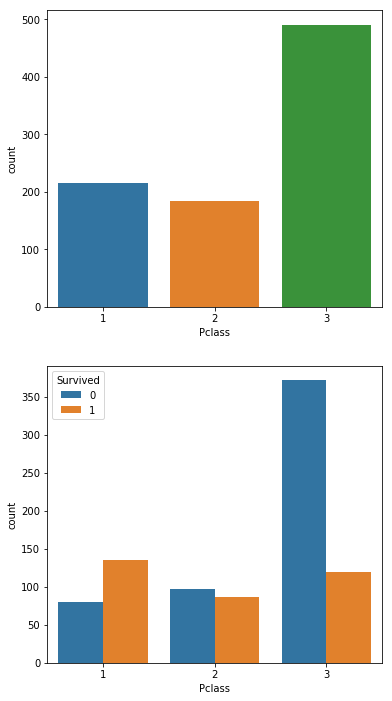

In [7]:
# Bar Chart to indicate the number of people survived based on their class
# If you are a first class, you have a higher chance of survival
plt.figure(figsize=[6,12])
plt.subplot(211) # 211 -> 2-rows, 1-column, 1st figure
sns.countplot(x = 'Pclass', data = training_set)
plt.subplot(212) # plotting the second figure in a subplot
sns.countplot(x = 'Pclass', hue = 'Survived', data=training_set)


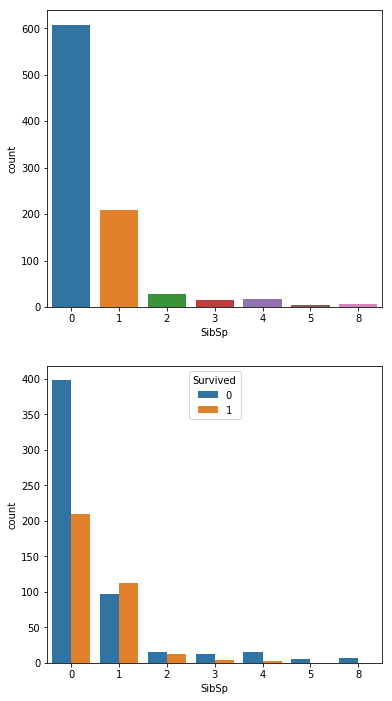

In [8]:
# Bar Chart to indicate the number of people survived based on their siblings status
# If you have 1 siblings (SibSp = 1), you have a higher chance of survival compared to being alone (SibSp = 0)
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data=training_set)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data=training_set)

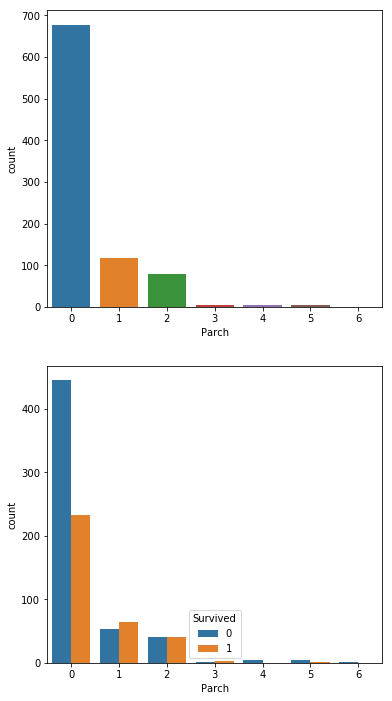

In [9]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Parch', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data=training_set)

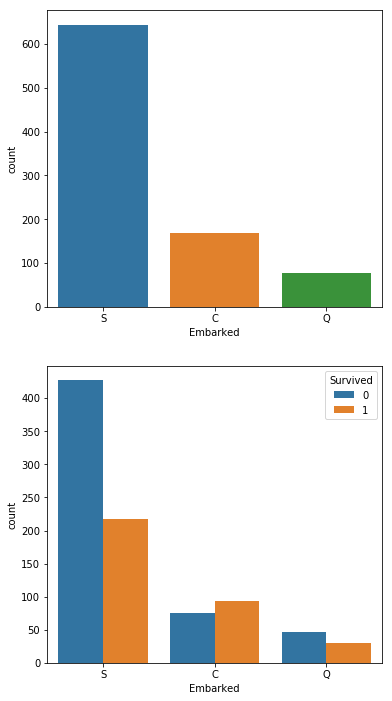

In [10]:
# Bar Chart to indicate the number of people survived based on the port they emparked from
# Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
# If you embarked from port "C", you have a higher chance of survival compared to other ports
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Embarked', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Embarked', hue = 'Survived', data=training_set)

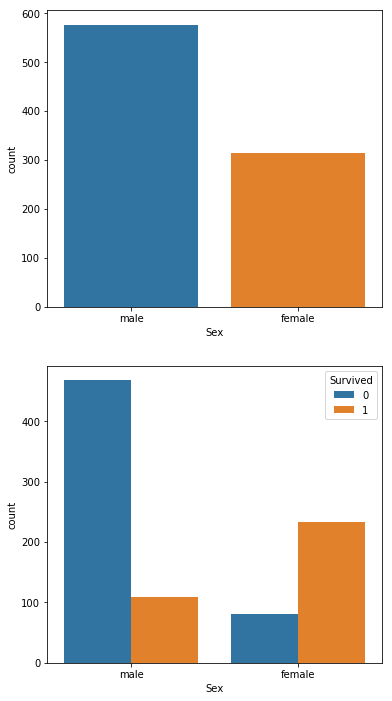

In [11]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Sex', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data=training_set)

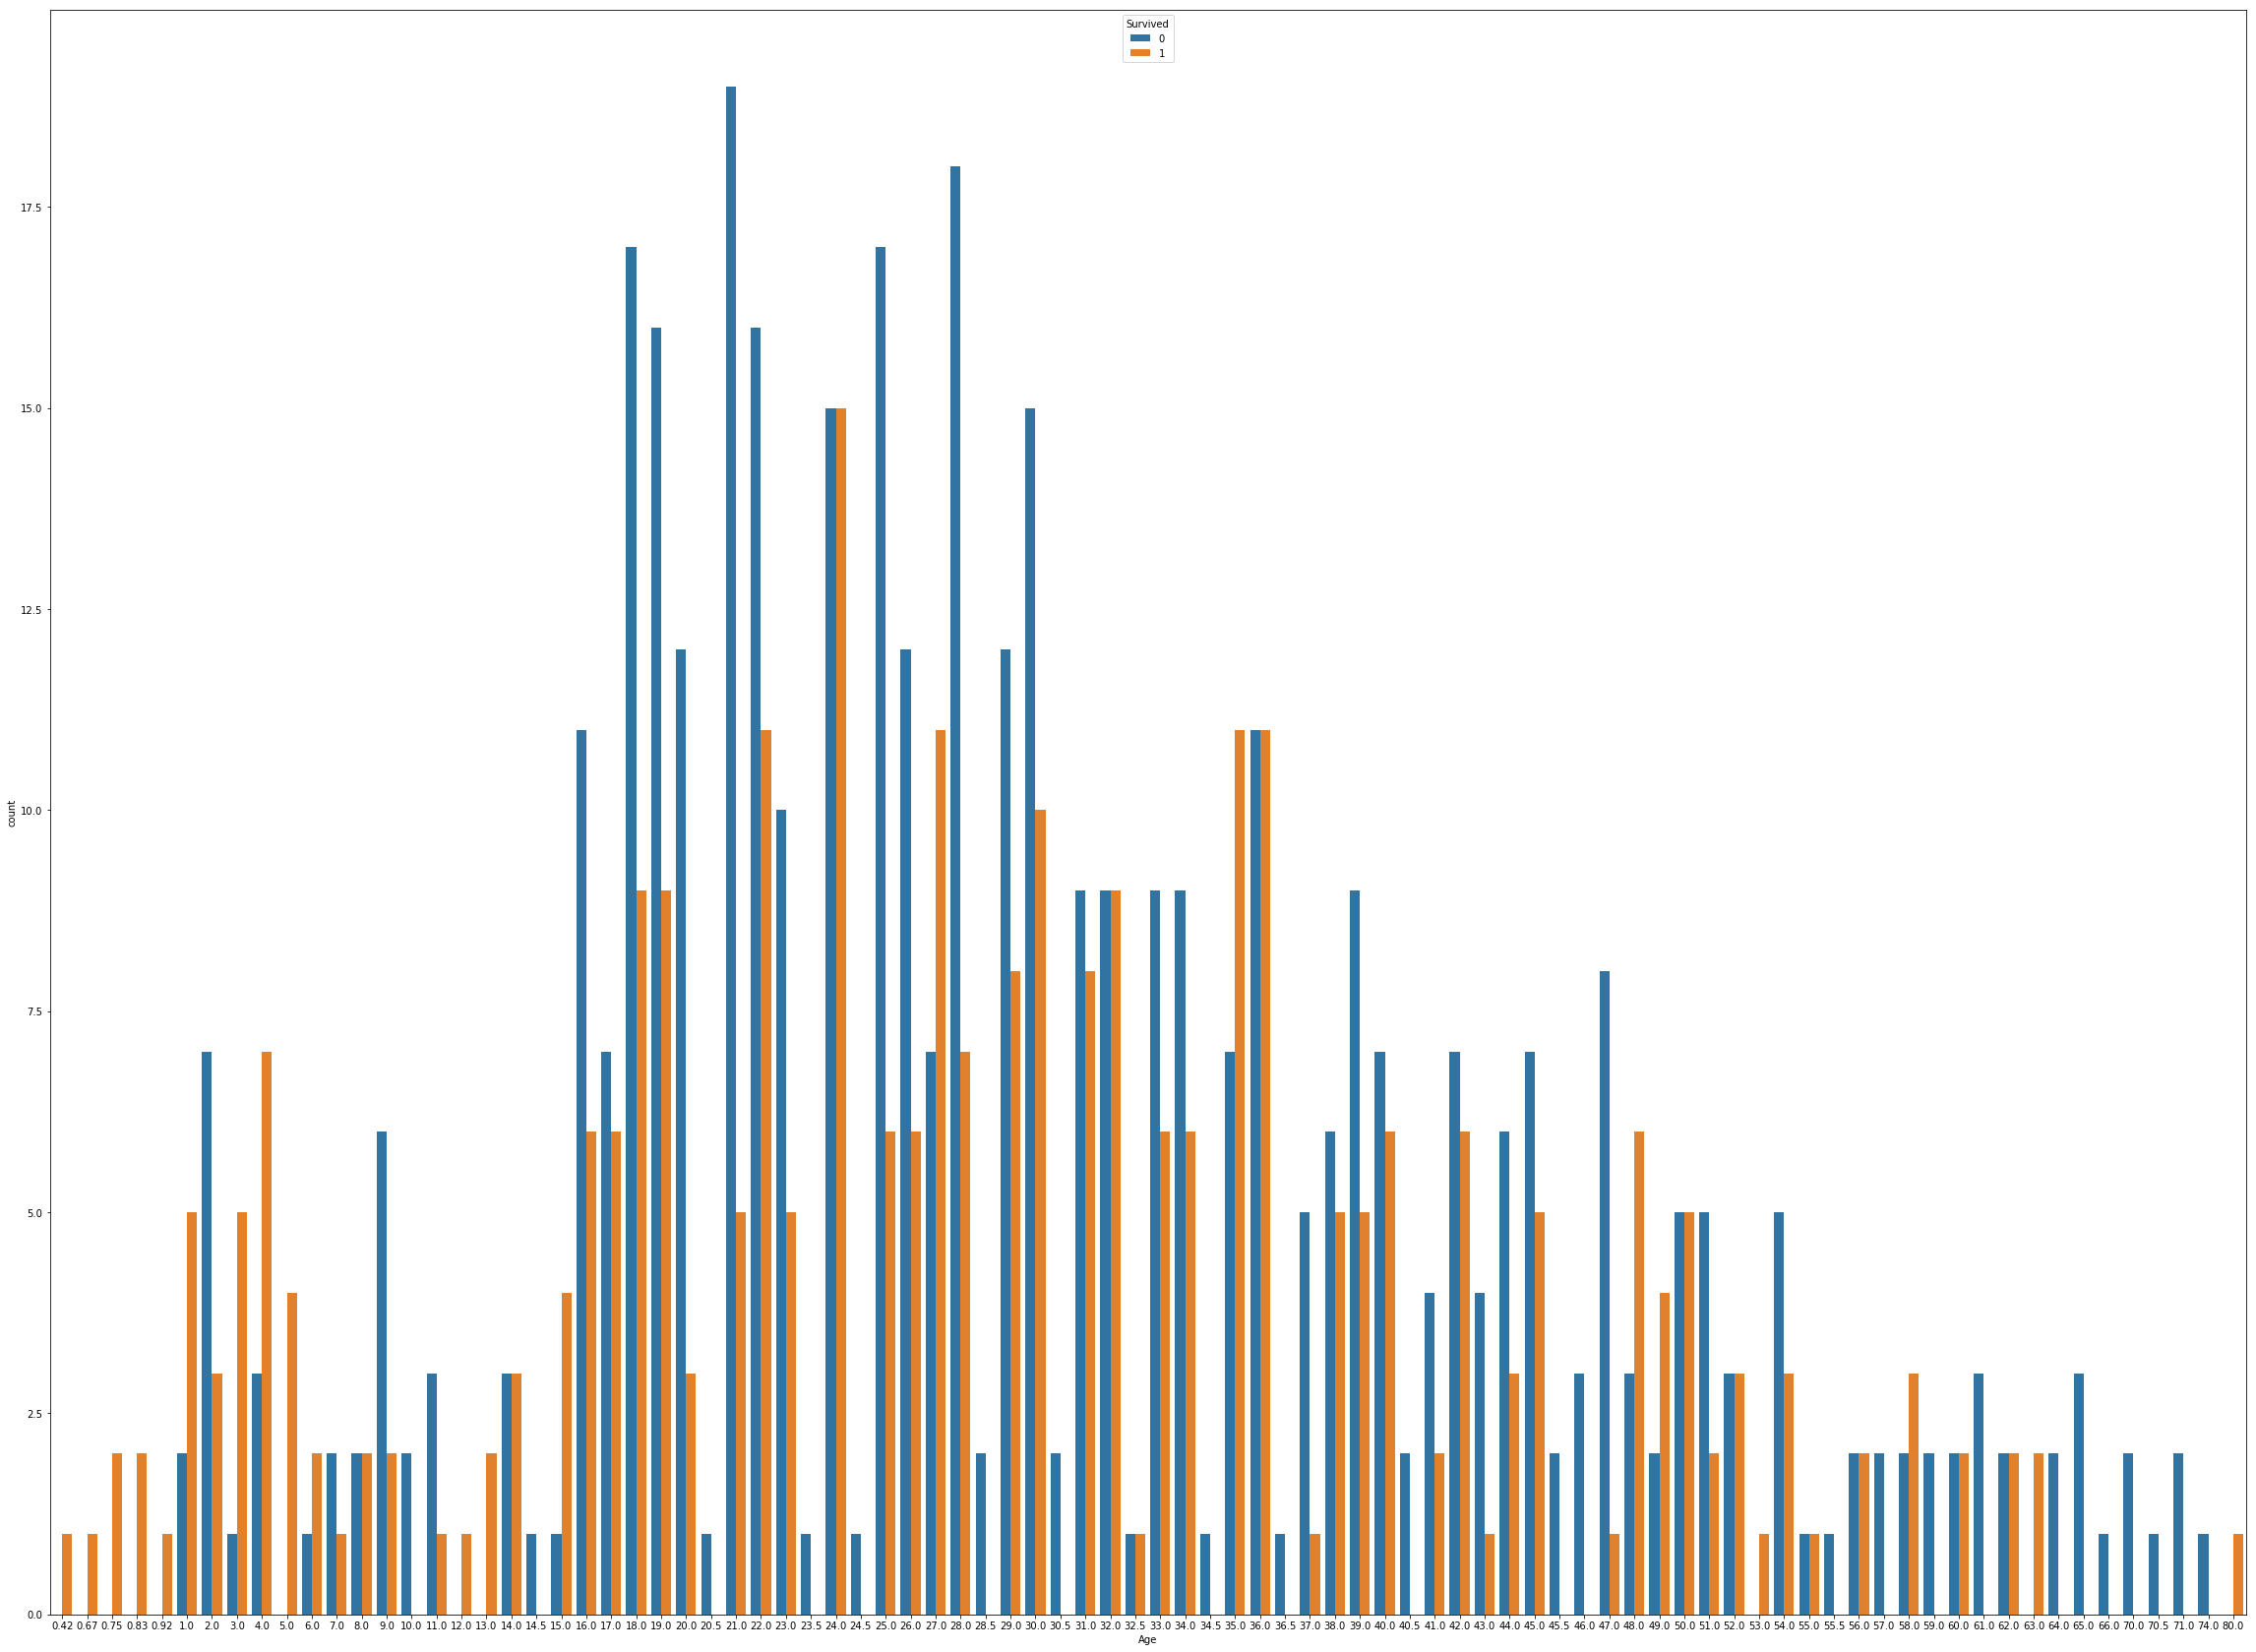

In [12]:
# Bar Chart to indicate the number of people survived based on their age
# If you are a baby, you have a higher chance of survival
plt.figure(figsize=(40,30))
sns.countplot(x = 'Age', hue = 'Survived', data=training_set)

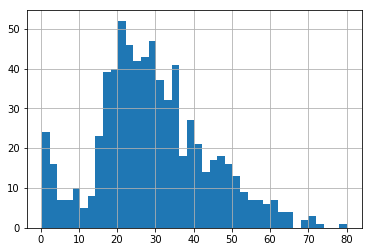

In [13]:
# Age Histogram 
training_set['Age'].hist(bins = 40)

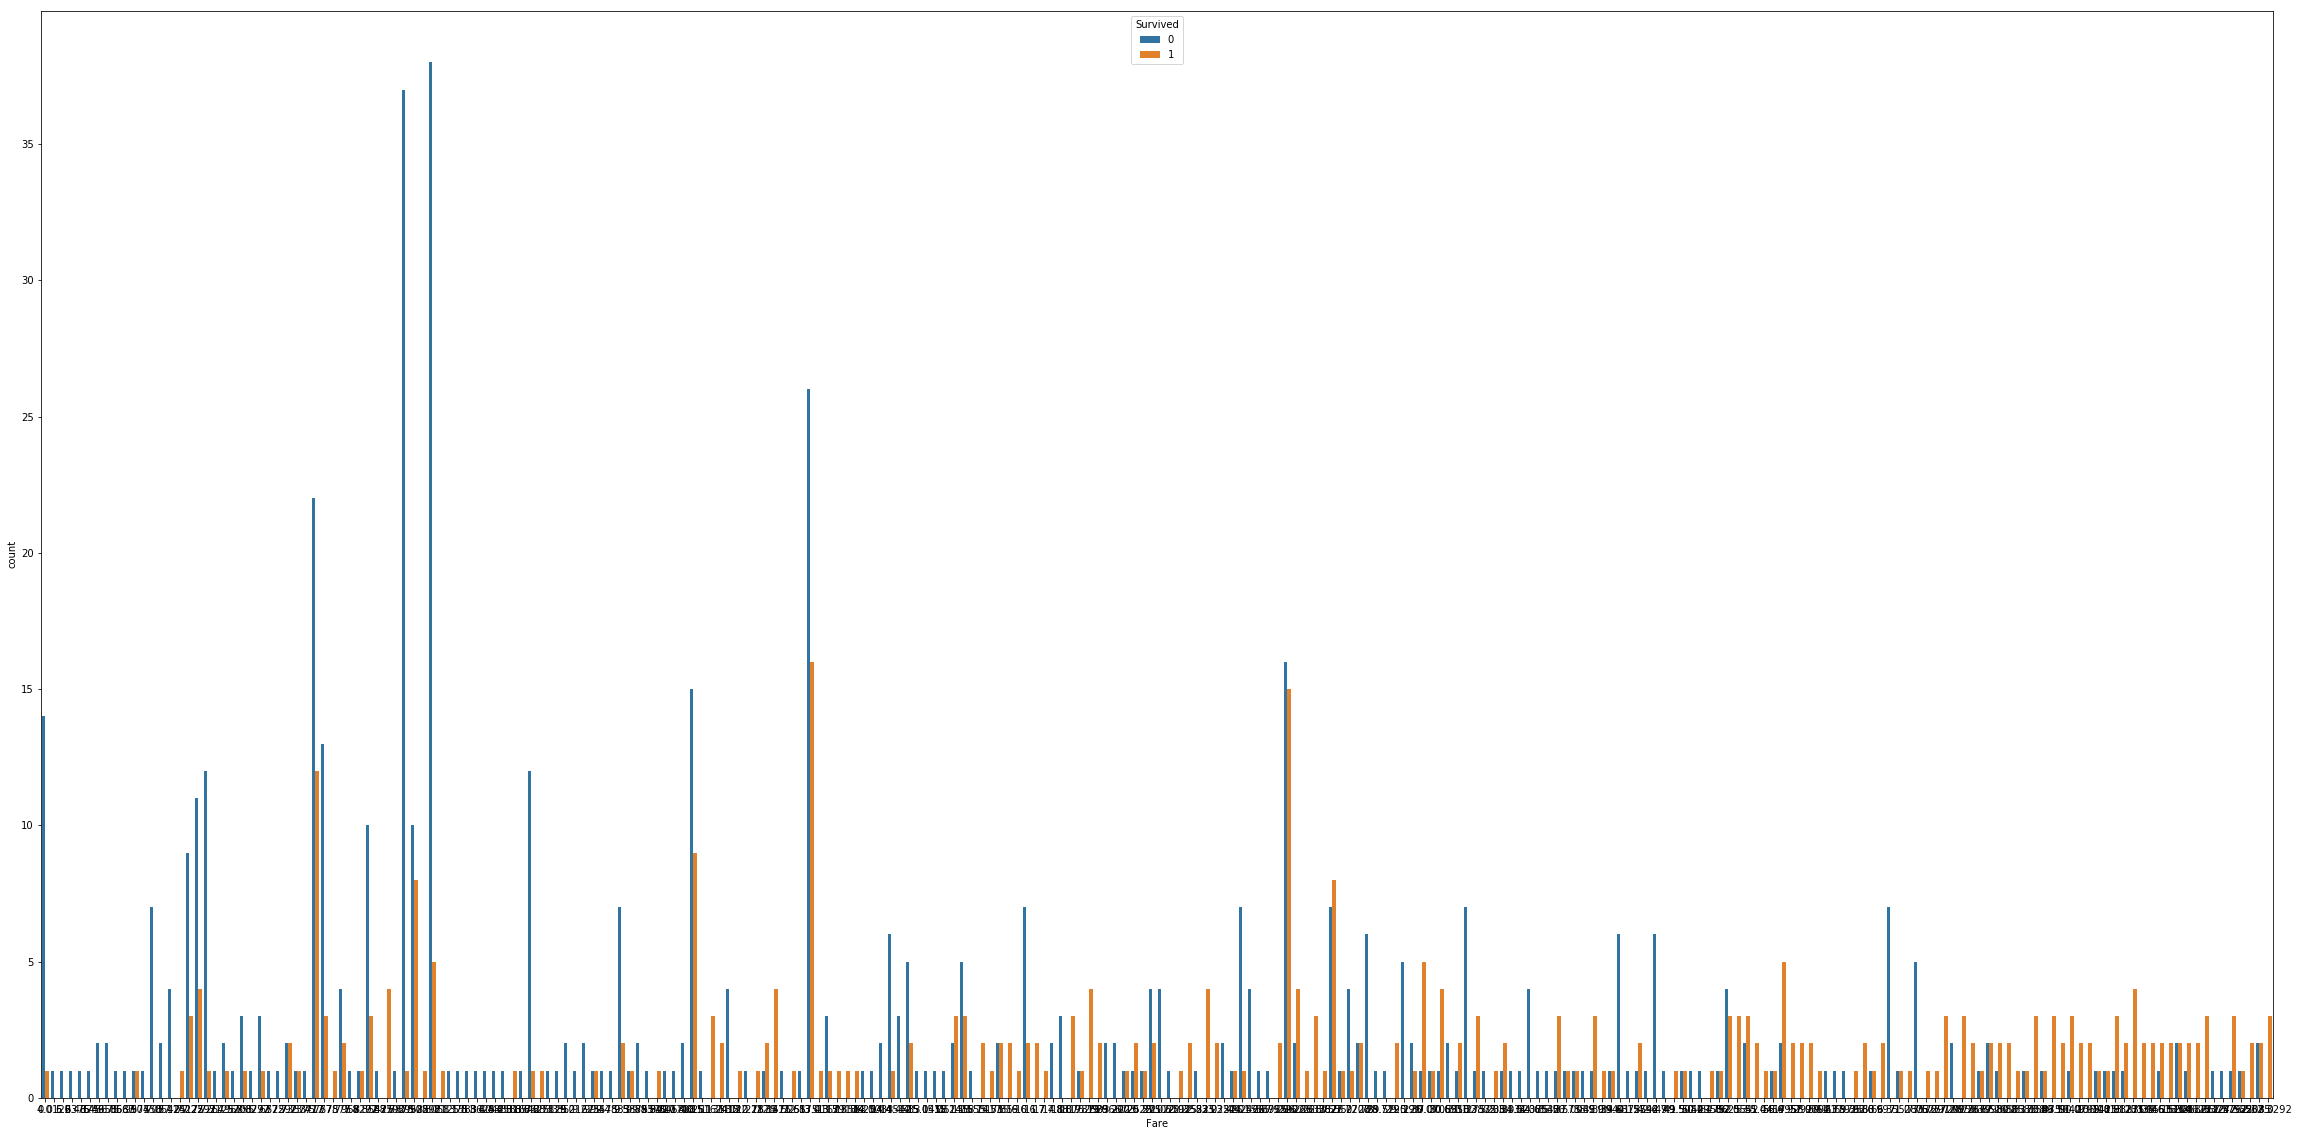

In [14]:
# Bar Chart to indicate the number of people survived based on their fare
# If you pay a higher fare, you have a higher chance of survival
plt.figure(figsize=(40,20))
sns.countplot(x = 'Fare', hue = 'Survived', data=training_set)

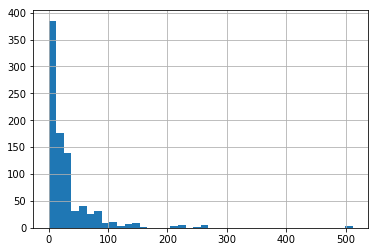

In [15]:
# Fare Histogram 
training_set['Fare'].hist(bins = 40)

## PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

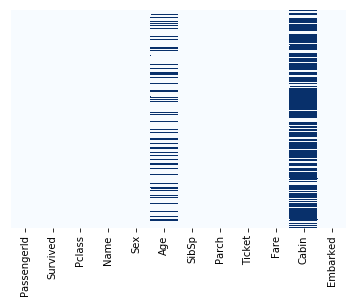

In [16]:
# Explore which dataset is missing
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [17]:
# Drop the cabin column - missing data and also not relevant
training_set.drop('Cabin',axis=1,inplace=True)

In [18]:
# Drop other irrelvant columns as well
training_set.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'],axis=1,inplace=True)

In [19]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


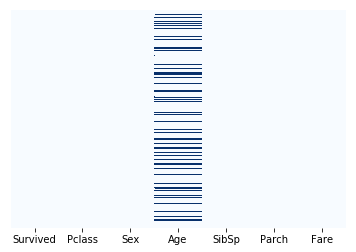

In [20]:
# View the data once again
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")


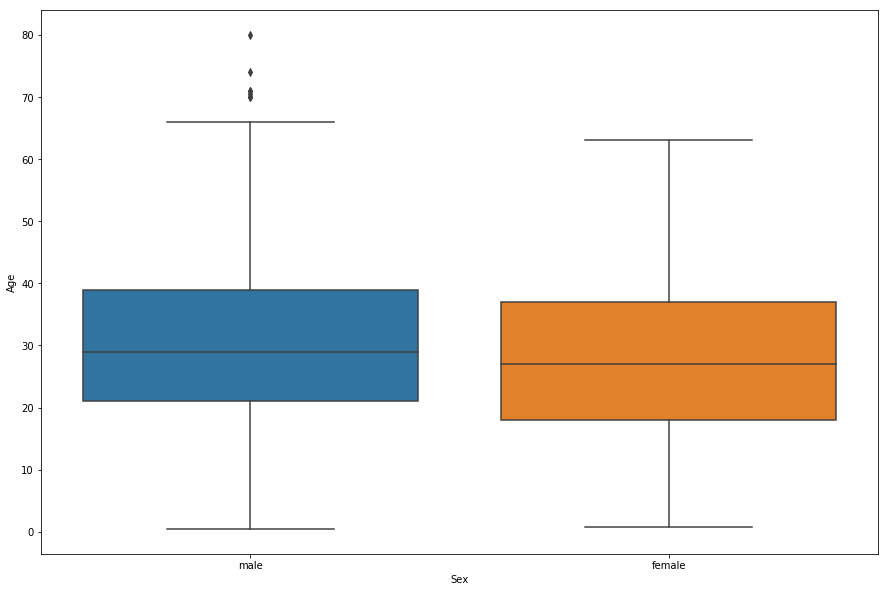

In [21]:
# Get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x='Sex', y='Age',data=training_set)

In [22]:
#training_set.groupby('Sex').Age.mean() # considers outliers - unwanted

In [23]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex is 'male': 
            return 29
        else:
            return 25
    else:
        return age
        

In [24]:
training_set['Age'] = training_set[['Age','Sex']].apply(Fill_Age,axis=1)

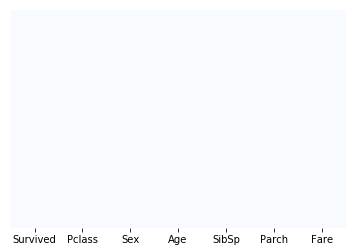

In [25]:
# View the data once more
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [26]:
pd.get_dummies(training_set['Sex'])
# One column is sufficient to represent male or female


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [27]:
male = pd.get_dummies(training_set['Sex'], drop_first = True)


In [28]:
# drop the embarked and sex 
training_set.drop(['Sex'], axis=1, inplace=True)

In [29]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,25.0,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


In [30]:
# Add the encoded column male again
training_set = pd.concat([training_set, male], axis=1)

In [31]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
5,0,3,25.0,0,0,8.4583,1
6,0,1,54.0,0,0,51.8625,1
7,0,3,2.0,3,1,21.0750,1
8,1,3,27.0,0,2,11.1333,0
9,1,2,14.0,1,0,30.0708,0


## MODEL TRAINING

In [32]:
# Drop the target coloumn before doing train test split
X = training_set.drop('Survived',axis=1).values
y = training_set['Survived'].values


In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## MODEL TESTING

In [36]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

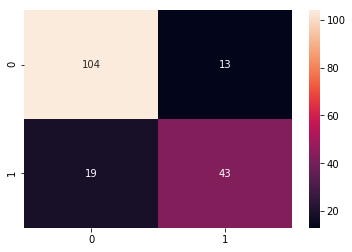

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87       117
          1       0.77      0.69      0.73        62

avg / total       0.82      0.82      0.82       179

